In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset from the provided URL
url = "https://github.com/raccamateo/NEC_BP_LR/raw/27108ebc3b574afd3f4bd7ea8b5d025907332499/A1-synthetic.txt"
synthetic_data = pd.read_csv(url, sep='\t')

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(synthetic_data.head())

First few rows of the dataset:
         #v1         v2        v3        v4          v5        v6         v7  \
0  37.344110  10.542156  0.969185  3.568534   96.798733  3.429026  75.810196   
1   4.089849  11.894301  0.467775  1.279044  100.149383  3.190073  76.423095   
2 -32.333439  10.968631  0.238486  1.410745  100.642075  3.093934  78.758727   
3 -45.632977  11.509606  0.924938  3.404069  105.963016  2.884269  83.027750   
4 -41.543394  10.117186  0.315180  1.020120   97.371423  2.815820  77.194463   

   v8         v9          z  
0   0  20.002459  11.805369  
1   0  12.702628   5.125025  
2   1  10.723848   3.218553  
3   0  19.946593  12.955092  
4   0  11.105024   1.919094  


In [4]:
# Checking for Missing Values
missing_values = synthetic_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
#v1    0
v2     0
v3     0
v4     0
v5     0
v6     0
v7     0
v8     0
v9     0
z      0
dtype: int64


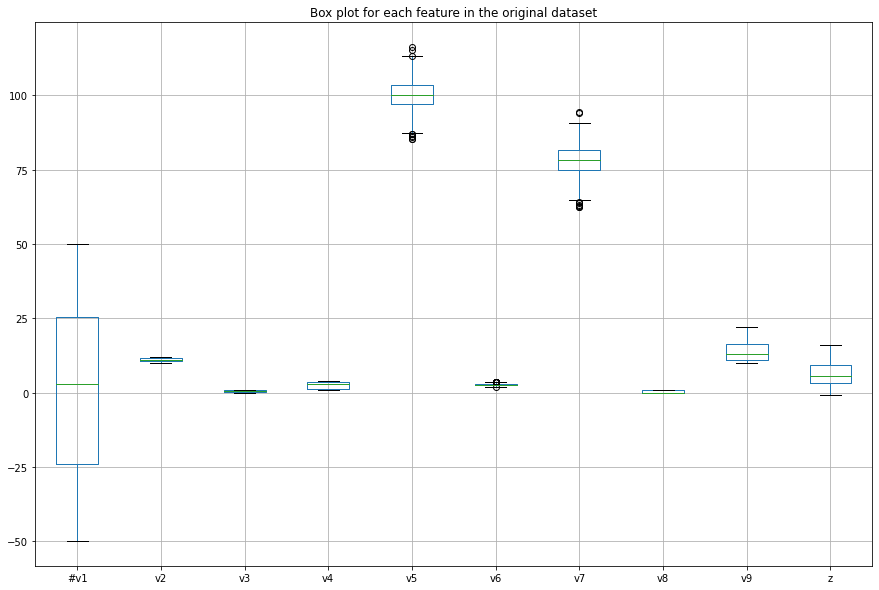

In [5]:
# Looking for Outliers using box plots on the original data (before normalization)
plt.figure(figsize=(15, 10))
synthetic_data.boxplot()
plt.title("Box plot for each feature in the original dataset")
plt.show()

In [6]:
def standardize_features(df, target_column):
    features = df.drop(target_column, axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled[target_column] = df[target_column].values  # Add the target column back unchanged
    return df_scaled

In [7]:
# Standardize features except for the target column
standardized_synthetic_data = standardize_features(synthetic_data, target_column=synthetic_data.columns[-1])

In [8]:
# Shuffle the dataset
standardized_synthetic_data = standardized_synthetic_data.sample(frac=1, random_state=0).reset_index(drop=True)

In [9]:
standardized_synthetic_data.to_csv('standardized_synthetic_data.csv', index=False)

In [10]:
# Calculate the number of samples for training (80%) and testing (20%)
num_samples = len(standardized_synthetic_data)
train_size = int(num_samples * 0.8)
test_size = num_samples - train_size

In [11]:
# Split the dataset
train_data_synthetic = standardized_synthetic_data.iloc[:train_size]
test_data_synthetic = standardized_synthetic_data.iloc[train_size:]

In [12]:
# Separate the features and the target variable for training and test data
X_train_synthetic = train_data_synthetic.iloc[:, :-1]
y_train_synthetic = train_data_synthetic.iloc[:, -1]
X_test_synthetic = test_data_synthetic.iloc[:, :-1]
y_test_synthetic = test_data_synthetic.iloc[:, -1]

In [13]:
# Displaying the first few rows of the training and test sets
print("Training features:")
print(X_train_synthetic.head())
print("\nTraining target:")
print(y_train_synthetic.head())
print("\nTest features:")
print(X_test_synthetic.head())
print("\nTest target:")
print(y_test_synthetic.head())

Training features:
        #v1        v2        v3        v4        v5        v6        v7  \
0  0.338497 -0.083967  0.464262  1.136505  1.214678  1.114884  1.211061   
1  1.510989 -1.694024  1.000160  0.948963  1.169016  1.665758  1.531970   
2  0.019873 -0.197036 -0.813867 -1.214567 -0.915665  1.442266 -0.845320   
3  1.172530 -1.470072 -0.623153 -0.852961  0.219144 -0.781070  0.565925   
4  1.181835  0.488107  0.436952  1.369883  0.151680  0.261784  0.042053   

         v8        v9  
0 -0.674985  0.233885  
1 -0.674985  0.786355  
2 -0.674985 -0.894396  
3 -0.674985 -0.808633  
4 -0.674985  0.242024  

Training target:
0    7.984439
1    7.678250
2    1.310445
3    2.819382
4    8.185281
Name: z, dtype: float64

Test features:
          #v1        v2        v3        v4        v5        v6        v7  \
800  0.381343 -1.187440  0.973463  1.361860 -0.514809 -1.220263 -0.226139   
801  1.019758  0.658219 -1.609342 -1.032355  0.315285  0.780422  0.155862   
802  0.148707 -0.127271  0.